In [100]:
from sklearn import datasets,mixture,cluster
import matplotlib.pyplot as plt

In [101]:
x=datasets.load_iris().data
y=datasets.load_iris().target

In [102]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

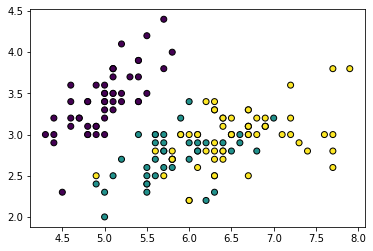

In [103]:
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='black')

In [104]:
gmm=mixture.GaussianMixture(covariance_type='full',n_components=3,init_params='kmeans')#covariance_type='spherical' /init_params='random'
gmm.fit(x)
pred=gmm.predict(x) 

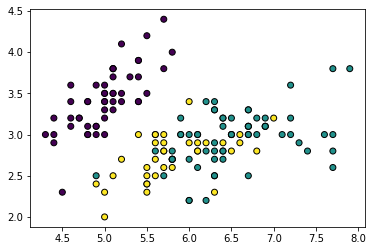

In [105]:
plt.scatter(x[:,0],x[:,1],c=pred,edgecolors='black')

# Kmeans vs GMM on generated data

In [106]:
varied=datasets.make_blobs(n_samples=1000,cluster_std=[5,1,0.5],random_state=3)#to make clusters dataset

In [107]:
x=varied[0]
y=varied[1]

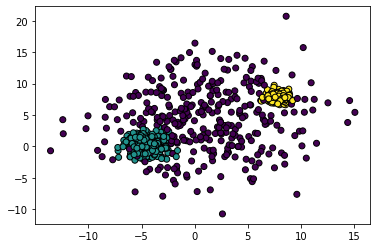

In [108]:
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='black')

In [98]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
pred=kmeans.fit_predict(x)

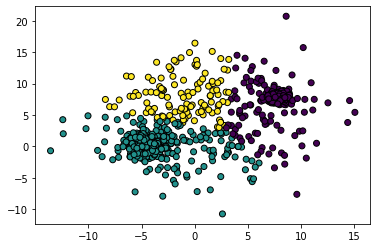

In [99]:
plt.scatter(x[:,0],x[:,1],c=pred,edgecolors='black')

In [82]:
from sklearn import mixture

In [86]:
gmm=mixture.GaussianMixture(n_components=3)
pred=gmm.fit_predict(x)

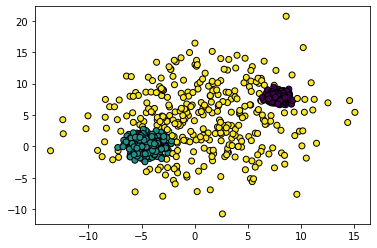

In [94]:
plt.scatter(x[:,0],x[:,1],c=pred,edgecolors='black')

# Kmeans vs GMM on iris data

In [114]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


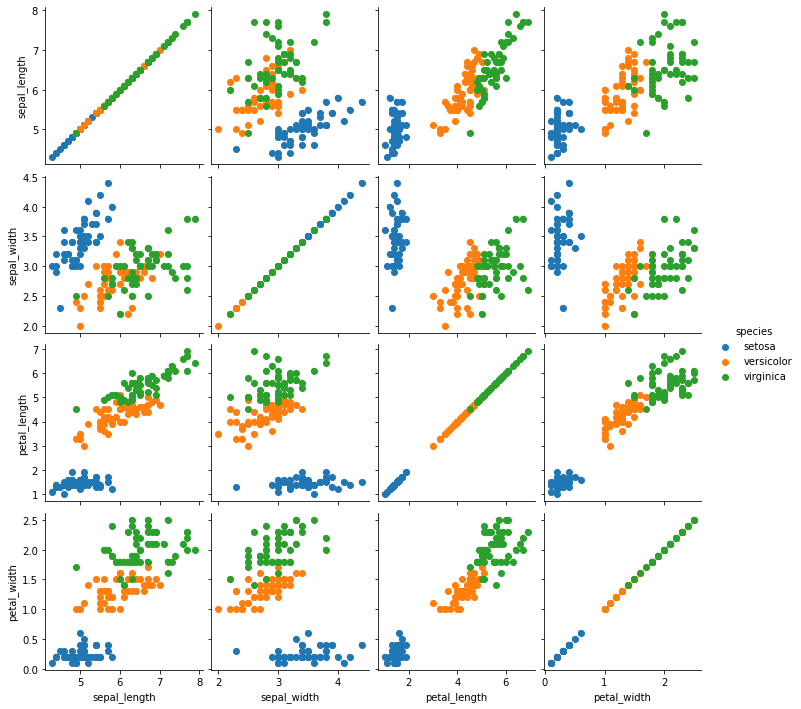

In [125]:
g=sns.pairplot(iris,hue='species',diag_kind=None)#sns.PairGrid(iris,hue='species')
g.map(plt.scatter)
plt.show()

In [130]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

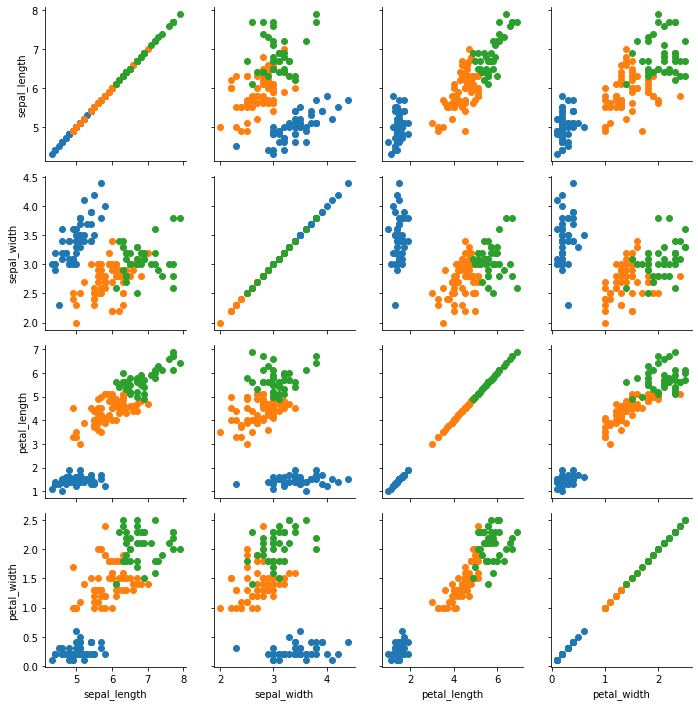

In [132]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue="kmeans_pred")
g.map(plt.scatter)
plt.show()

# Using scoring methods

visual inspection is no longer useful if we're working

We can use an external cluster validation index such as the adjusted Rand score which generates a score between -1 and 1

In [178]:
from sklearn.metrics import adjusted_rand_score

print(f"KMeans score= {adjusted_rand_score(iris['kmeans_pred'],iris['species'])}")

KMeans score= 0.7302382722834697


In [179]:
gmm=mixture.GaussianMixture(n_components=3)
pred=gmm.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])
print(f"GMM score= {adjusted_rand_score(pred,iris['species'])}")

GMM score= 0.9038742317748124


In [141]:
adjusted_rand_score(pred,iris['species'])

0.9038742317748124

## KMeans vs DBSCAN vs GMM on crescent data

In [169]:
data=datasets.make_moons(n_samples=100,noise=0.05)
x=data[0]
y=data[1]

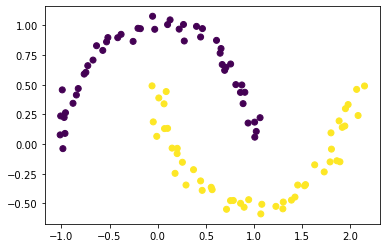

In [181]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

## trying GMM

In [174]:
gmm=mixture.GaussianMixture(n_components=2)
pred=gmm.fit_predict(x)

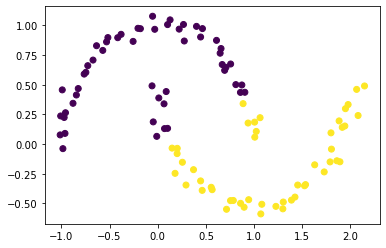

In [175]:
plt.scatter(x[:,0],x[:,1],c=pred)

## trying KMeans

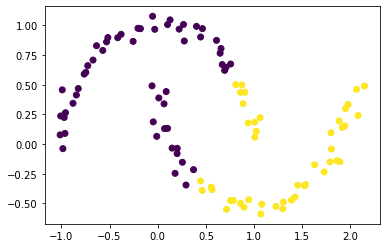

In [183]:
kmeans=KMeans(n_clusters=2)
kmeans_pred=kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=kmeans_pred)

## trying DBSCAN

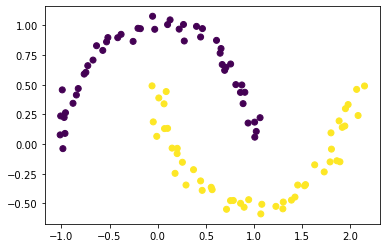

In [189]:
from sklearn import cluster

db=cluster.DBSCAN(eps=0.3,min_samples=3)
db_pred=db.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=db_pred)